# Eliminación de orden cero

Componente de Orden Cero:

La componente de orden cero en una imagen de holograma se refiere a la información de fondo o la información constante que no está relacionada con el objeto o el contenido principal del holograma. Esta componente puede incluir la iluminación de fondo, ruido, imperfecciones en la grabación del holograma y otros elementos que no deseas en la imagen final del holograma.

Métodos de Eliminación:

Filtrado Espacial: En algunos casos, puedes aplicar un filtro espacial, como un filtro de paso alto o un filtro de alta frecuencia, para eliminar componentes de baja frecuencia, que generalmente corresponden a la componente de orden cero. Esto realza las características del holograma y reduce la información constante de fondo.

Selección y Eliminación Manual: Utiliza herramientas de selección, como la varita mágica o la herramienta de selección libre, para seleccionar la componente de orden cero en la imagen y luego elimínala. También puedes usar herramientas de pinceles y clonación para retocar manualmente la imagen y eliminar elementos no deseados.

Transformada de Fourier: La transformada de Fourier puede ser útil para separar las componentes de baja frecuencia de las de alta frecuencia en la imagen de holograma. Al eliminar las frecuencias bajas, puedes eliminar la componente de orden cero.

Aplicaciones: La eliminación de la componente de orden cero es importante en la holografía porque permite aislar y visualizar el objeto o la información deseada en el holograma sin la interferencia de la información de fondo. Esto es esencial en aplicaciones como la inspección de objetos tridimensionales y la visualización de hologramas.

## Holograma teórico

In [ ]:
import numpy as np

# Carga las dos imágenes que deseas restar
I = cv2.imread('/content/test_holograma_/Pruebas_muestra_sangre_zoom/I.bmp')
O = cv2.imread('/content/test_holograma_/Pruebas_muestra_sangre_zoom/O.bmp')
R = cv2.imread('/content/test_holograma_/Pruebas_muestra_sangre_zoom/R.bmp')

# Convertir la imagen a escala de grises
gris_I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
gris_O = cv2.cvtColor(O, cv2.COLOR_BGR2GRAY)
gris_R  = cv2.cvtColor(R, cv2.COLOR_BGR2GRAY)

# Asegúrate de que ambas imágenes tengan las mismas dimensiones
if gris_I.shape == gris_O.shape == gris_R.shape:
    # Realiza la resta de imágenes
    resultado = cv2.add(gris_R**2, gris_O**2)
    resultados = cv2.subtract(gris_I, resultado)

    conjugada_R = np.conjugate(gris_R)[0,1]
    conjugada_O = np.conjugate(gris_O)[0,1]

    OR = np.dot(gris_O, conjugada_R)
    RO = np.dot(gris_R, conjugada_O)
    sum = cv2.add(OR, RO)


    holograma = 2*(sum)

    sum2 = cv2.add(gris_I, holograma)

    # Guarda el resultado en un archivo de imagen
    cv2.imwrite('resultados.jpg', resultado)
    cv2.imwrite('holograma.jpg', holograma)
    cv2.imwrite('I_GRIS.jpg', gris_I)
    cv2.imwrite('SUM2.jpg', sum2)

    # Muestra el resultado
    #cv2.imshow('Resultado', resultado)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
else:
    print("Las imágenes tienen dimensiones diferentes y no se pueden restar.")

In [1]:
import numpy as np
import cv2

In [2]:
! git clone https://github.com/ijrios/test_holograma_

Cloning into 'test_holograma_'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 26 (delta 3), reused 13 (delta 2), pack-reused 12
Receiving objects: 100% (26/26), 69.89 MiB | 13.29 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Updating files: 100% (15/15), done.


In [36]:
# Se carga la imagen de holograma y Objeto
I = cv2.imread('/content/test_holograma_/Pruebas_muestra_sangre_zoom/I.bmp')
O = cv2.imread('/content/test_holograma_/Pruebas_muestra_sangre_zoom/O.bmp')
R = cv2.imread('/content/test_holograma_/Pruebas_muestra_sangre_zoom/R.bmp')
Resultado = cv2.imread('/content/test_holograma_/Pruebas_muestra_sangre_zoom/resultados.jpg')

# Convertir la imagen a escala de grises
GRIS_I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
GRIS_O = cv2.cvtColor(O, cv2.COLOR_BGR2GRAY)
GRIS_R  = cv2.cvtColor(R, cv2.COLOR_BGR2GRAY)
GRIS_RES  = cv2.cvtColor(Resultado, cv2.COLOR_BGR2GRAY)

In [37]:
# Se Realiza la Transformada de Fourier 2D
transformada_fourier_I = np.fft.fft2(GRIS_I)
transformada_fourier_O = np.fft.fft2(GRIS_O)
transformada_fourier_R = np.fft.fft2(GRIS_R)
transformada_fourier_Res = np.fft.fft2(GRIS_RES)

In [38]:
# Se desplaza el componente de orden cero al centro
transformada_fourier_desplazada_I = np.fft.fftshift(transformada_fourier_I)
transformada_fourier_desplazada_O = np.fft.fftshift(transformada_fourier_O)
transformada_fourier_desplazada_R = np.fft.fftshift(transformada_fourier_R)
transformada_fourier_desplazada_Res = np.fft.fftshift(transformada_fourier_Res)

In [39]:
# Se calcula el espectro de amplitud (magnitud)
espectro_amplitud_I = np.abs(transformada_fourier_desplazada_I)
espectro_amplitud_O = np.abs(transformada_fourier_desplazada_O)
espectro_amplitud_R = np.abs(transformada_fourier_desplazada_R)
espectro_amplitud_Res = np.abs(transformada_fourier_desplazada_Res)

In [40]:
# Se aplica un filtro para eliminar las frecuencias bajas (componente de orden cero)
umbral = 50
espectro_amplitud_filtrado_I = np.where(espectro_amplitud_I < umbral, 0, espectro_amplitud_I)
espectro_amplitud_filtrado_O = np.where(espectro_amplitud_O < umbral, 0, espectro_amplitud_O)
espectro_amplitud_filtrado_R = np.where(espectro_amplitud_R < umbral, 0, espectro_amplitud_R)
espectro_amplitud_filtrado_Res = np.where(espectro_amplitud_Res < umbral, 0, espectro_amplitud_Res)

In [41]:
# Se deshace el desplazamiento
transformada_fourier_filtrada_I = np.fft.ifftshift(espectro_amplitud_filtrado_I)
transformada_fourier_filtrada_O = np.fft.ifftshift(espectro_amplitud_filtrado_O)
transformada_fourier_filtrada_R = np.fft.ifftshift(espectro_amplitud_filtrado_R)
transformada_fourier_filtrada_Res = np.fft.ifftshift(espectro_amplitud_filtrado_Res)

In [42]:
# Se aplica la Transformada de Fourier inversa para obtener la imagen filtrada
imagen_filtrada_I = np.fft.ifft2(transformada_fourier_filtrada_I).real
imagen_filtrada_O = np.fft.ifft2(transformada_fourier_filtrada_O).real
imagen_filtrada_R = np.fft.ifft2(transformada_fourier_filtrada_R).real
imagen_filtrada_Res = np.fft.ifft2(transformada_fourier_filtrada_Res).real

In [43]:
# Se convierte la imagen a tipo de datos uint8 (8 bits sin signo)
imagen_filtrada_I = np.uint8(imagen_filtrada_I)
imagen_filtrada_O = np.uint8(imagen_filtrada_O)
imagen_filtrada_R = np.uint8(imagen_filtrada_R)
imagen_filtrada_Res = np.uint8(imagen_filtrada_Res)

# Se guarda la imagen filtrada
cv2.imwrite('imagen_filtrada_I.png', imagen_filtrada_I)
cv2.imwrite('imagen_filtrada_O.png', imagen_filtrada_O)
cv2.imwrite('imagen_filtrada_R.png', imagen_filtrada_R)
cv2.imwrite('imagen_filtrada_Respuesta.png', imagen_filtrada_Res)

True

## Mostramos resultados

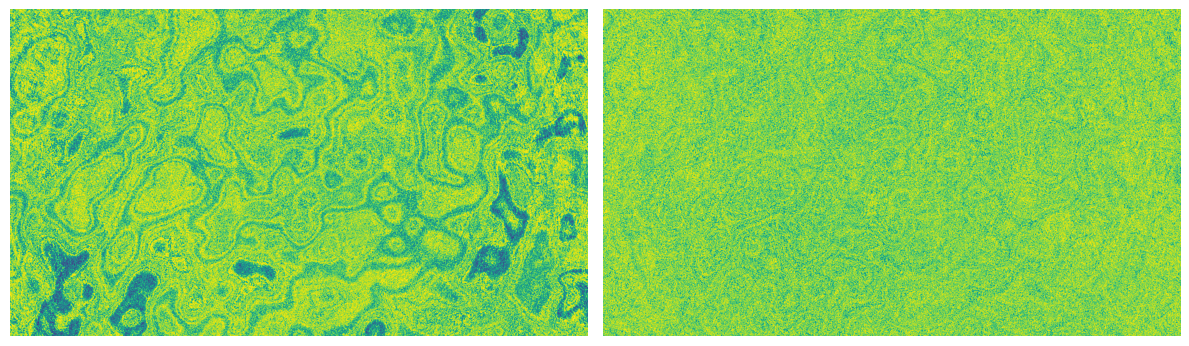

In [46]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Rutas de las imágenes que deseas mostrar
imagenes = ['/content/test_holograma_/Pruebas_muestra_sangre_zoom/resultados.jpg', '/content/test_holograma_/Pruebas_muestra_sangre_zoom/holograma.jpg']
fig, axs = plt.subplots(1, len(imagenes), figsize=(12, 4))

# Mostrar cada imagen en un subplot
for i, imagen in enumerate(imagenes):
    img = mpimg.imread(imagen)
    axs[i].imshow(img)
    axs[i].axis('off')

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

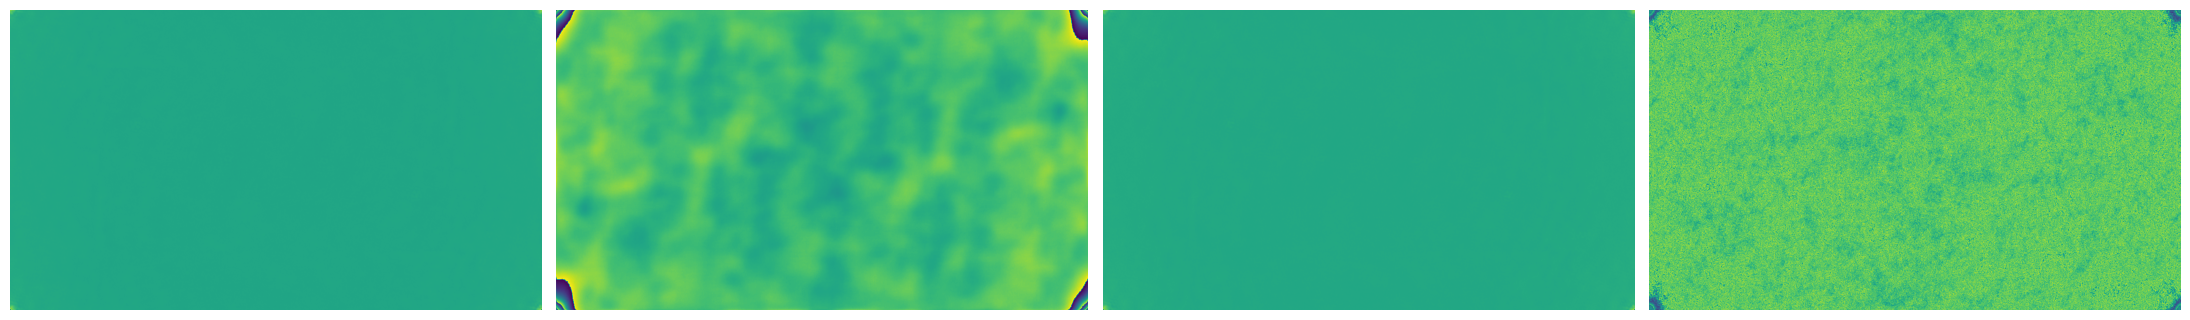

In [50]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Rutas de las imágenes que deseas mostrar
imagenes = ['/content/imagen_filtrada_I.png', '/content/imagen_filtrada_O.png', '/content/imagen_filtrada_R.png','/content/imagen_filtrada_Respuesta.png']
fig, axs = plt.subplots(1, len(imagenes), figsize=(22, 10))

# Mostrar cada imagen en un subplot
for i, imagen in enumerate(imagenes):
    img = mpimg.imread(imagen)
    axs[i].imshow(img)
    axs[i].axis('off')

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

## Resta de Holograma teórico menos orden sero de holograma.

In [48]:
# Se carga la imagen de holograma y Objeto
resul = cv2.imread('/content/test_holograma_/Pruebas_muestra_sangre_zoom/resultados.jpg')
filtrada = cv2.imread('/content/imagen_filtrada_Respuesta.png')

if resul.shape == filtrada.shape:
    # Realiza la resta de imágenes
    resultados = cv2.subtract(resul, filtrada)
    # Guarda el resultado en un archivo de imagen
    cv2.imwrite('resta_final.jpg', resultados)

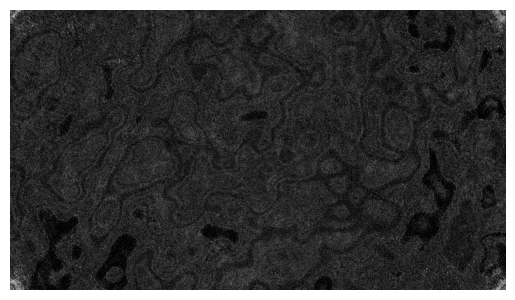

In [52]:
imagen = '/content/resta_final.jpg'
img = mpimg.imread(imagen)

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')  # Para ocultar los ejes
plt.show()